In [22]:
%matplotlib inline

In [23]:
from numpy import *
from pylab import *

In [30]:
n = 10

In [31]:
q = linspace(0,1,n+1)

In [32]:
ref = 1025 # So that x_i+1 - x_i is exactly representable in base 2
x = linspace(0,1,ref)

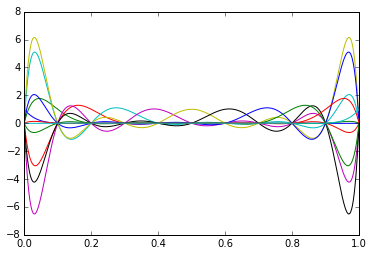

In [33]:
Ln = zeros((n+1, len(x)))

for i in range(n+1):
    Ln[i] = product([ (x-q[j])/(q[i]-q[j]) for j in range(n+1) if j != i], axis=0)

_ = plot(x,Ln.T)

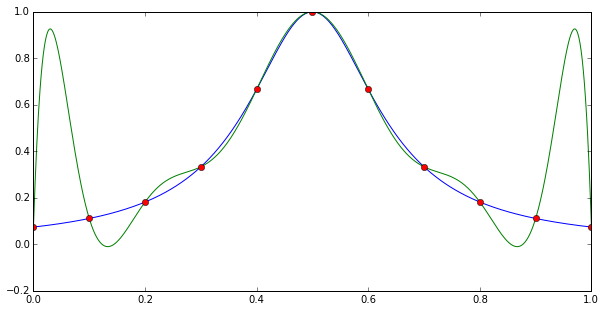

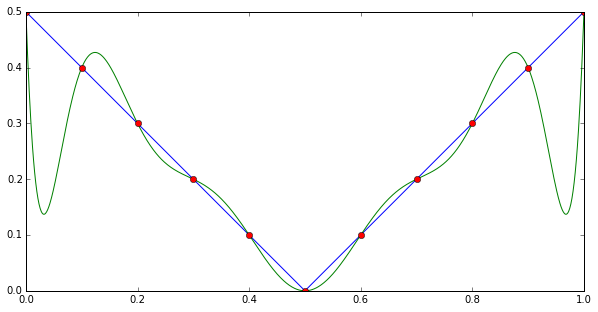

In [34]:
# A little "macro". This assumes Ln, q, and x are all defined
# Notice: technically this is a python function. However, it 
# expects symbols and variables to be defined in the global scope
# and this is **not** good programming style. It may be very 
# useful and fast at times, but try not to overdo it.
#
# I'd call it a function if internally it did not use any globally
# defined variable.

def my_plot(f):
    figure(figsize=[10,5])
    y = Ln.T.dot(f(q))
    _ = plot(x, f(x))
    _ = plot(x, y)
    _ = plot(q, f(q), 'ro')
    show()

# my_plot(sin)
# my_plot(cos)

# When we need something more complicated than simply cos, or sin, 
# we can use "on the fly" function definitions, or lambda functions:
# my_plot(lambda x: cos(2*pi*x))

# Lambda functions can be assigned too, for convenience and later 
# reuse...
runge = lambda x: 1.0/(1+50*(.5-x)**2)
my_plot(runge)

# Alternatively, you can define the function in the classical pythonic
# way:
def shifted_abs(x):
    return abs(x-.5)

my_plot(shifted_abs)